In [1]:
from infrastructure.engine import postgres_local_session_factory
import sys
sys.path.append('../../')
from tests.factories import user_factory, bank_account_factory

session = postgres_local_session_factory.get_session()

In [2]:
users = []
for i in range(20):
    users.append(user_factory())
    users[i].bank_account = bank_account_factory()

In [3]:
from tests.factories import random_transactions_generator
random_transactions_generator(session, 50, users)

error: User doesn't have enough money: (psycopg2.errors.CheckViolation) new row for relation "bank_accounts" violates check constraint "bank_accounts_balance_check"
DETAIL:  Failing row contains (9, -6161, 2023-10-12 11:33:00.921184, 9).

[SQL: INSERT INTO bank_accounts (user_id, balance, creation_date) VALUES (%(user_id)s, %(balance)s, %(creation_date)s) RETURNING bank_accounts.id]
[parameters: {'user_id': 9, 'balance': -6161, 'creation_date': datetime.datetime(2023, 10, 12, 11, 33, 0, 921184)}]
(Background on this error at: https://sqlalche.me/e/20/gkpj)
error: User doesn't have enough money: (psycopg2.errors.CheckViolation) new row for relation "bank_accounts" violates check constraint "bank_accounts_balance_check"
DETAIL:  Failing row contains (10, -2714, 2023-10-12 11:33:02.598634, 10).

[SQL: INSERT INTO bank_accounts (user_id, balance, creation_date) VALUES (%(user_id)s, %(balance)s, %(creation_date)s) RETURNING bank_accounts.id]
[parameters: {'user_id': 10, 'balance': -2714, 'c

c:\Z DOCUMENTOS\X\Codigos\desarrollo tp\src\bank_of_tomorrow\services\transaction_service.py:15: SAWarning: Object of type <Transaction> not in session, add operation along 'BankAccount.origin_transactions' will not proceed
  session.flush()


error: User doesn't have enough money: (psycopg2.errors.CheckViolation) new row for relation "bank_accounts" violates check constraint "bank_accounts_balance_check"
DETAIL:  Failing row contains (23, -1136, 2023-10-12 11:32:59.535431, 23).

[SQL: UPDATE bank_accounts SET balance=%(balance)s WHERE bank_accounts.id = %(bank_accounts_id)s]
[parameters: {'balance': -1136.0, 'bank_accounts_id': 23}]
(Background on this error at: https://sqlalche.me/e/20/gkpj)
error: User doesn't have enough money: (psycopg2.errors.CheckViolation) new row for relation "bank_accounts" violates check constraint "bank_accounts_balance_check"
DETAIL:  Failing row contains (27, -7728, 2023-10-12 11:33:01.932595, 20).

[SQL: INSERT INTO bank_accounts (user_id, balance, creation_date) VALUES (%(user_id)s, %(balance)s, %(creation_date)s) RETURNING bank_accounts.id]
[parameters: {'user_id': 20, 'balance': -7728, 'creation_date': datetime.datetime(2023, 10, 12, 11, 33, 1, 932595)}]
(Background on this error at: https:

In [4]:
users

[User(id=None, username='user1', name='user1_name', surname='user1_surname', hashed_password='$2b$12$aHKDSsryls5tmrZbQo1ImeXOx6Hth2JqO4fefsZ1QSrbQwum6x1Qm', email='user1@example.com', dni=303988, age=64, creation_date=datetime.datetime(2023, 10, 12, 11, 32, 56, 104249), last_updated=datetime.datetime(2023, 10, 12, 11, 32, 56, 104249), last_login=None, bank_account=BankAccount(id=None, user_id=None, balance=3340, creation_date=datetime.datetime(2023, 10, 12, 11, 32, 56, 119809), user=..., origin_transactions=[], destiny_transactions=[])),
 User(id=None, username='user2', name='user2_name', surname='user2_surname', hashed_password='$2b$12$yxHcnKyrkXEolCd/m.lgd.Op8Z8a6LLOIxNInn9UOAh4SRXJMyXm6', email='user2@example.com', dni=899971, age=27, creation_date=datetime.datetime(2023, 10, 12, 11, 32, 56, 454312), last_updated=datetime.datetime(2023, 10, 12, 11, 32, 56, 454312), last_login=None, bank_account=BankAccount(id=None, user_id=None, balance=17103, creation_date=datetime.datetime(2023, 1

In [5]:
session.commit()

In [6]:
from infrastructure.models import User
test_user = session.query(User).get(11)

C:\Users\TZ\AppData\Local\Temp\ipykernel_1012\4246612650.py:2: LegacyAPIWarning: The Query.get() method is considered legacy as of the 1.x series of SQLAlchemy and becomes a legacy construct in 2.0. The method is now available as Session.get() (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  test_user = session.query(User).get(11)


In [7]:
test_user

User(id=11, username='user6', name='user6_name', surname='user6_surname', hashed_password='$2b$12$yjpZCvW3nN8m1s8IEqZb.eo.YuAZO5EaVqSD./tuxp7TvM1UFkLMa', email='user6@example.com', dni='545167', age=90, creation_date=datetime.datetime(2023, 10, 12, 11, 32, 57, 803106), last_updated=datetime.datetime(2023, 10, 12, 11, 32, 57, 803106), last_login=None, bank_account=BankAccount(id=11, user_id=11, balance=1253.0, creation_date=datetime.datetime(2023, 10, 12, 11, 32, 57, 803106), user=..., origin_transactions=[Transaction(id=3, origin_account_id=11, destination_account_id=12, amount=2436.0, transaction_date=datetime.datetime(2023, 10, 12, 11, 33, 2, 721706), origin_account=..., destination_account=BankAccount(id=12, user_id=12, balance=609.0, creation_date=datetime.datetime(2023, 10, 12, 11, 32, 59, 185424), user=User(id=12, username='user10', name='user10_name', surname='user10_surname', hashed_password='$2b$12$rkDGj0xzd/K5p0.Rfiz8LOSnxLE2RM37/dkjysxEeKyr55BOA6GcK', email='user10@example.c

In [8]:
transactions = test_user.bank_account.origin_transactions + test_user.bank_account.destiny_transactions

In [9]:
transactions

[Transaction(id=3, origin_account_id=11, destination_account_id=12, amount=2436.0, transaction_date=datetime.datetime(2023, 10, 12, 11, 33, 2, 721706), origin_account=BankAccount(id=11, user_id=11, balance=1253.0, creation_date=datetime.datetime(2023, 10, 12, 11, 32, 57, 803106), user=User(id=11, username='user6', name='user6_name', surname='user6_surname', hashed_password='$2b$12$yjpZCvW3nN8m1s8IEqZb.eo.YuAZO5EaVqSD./tuxp7TvM1UFkLMa', email='user6@example.com', dni='545167', age=90, creation_date=datetime.datetime(2023, 10, 12, 11, 32, 57, 803106), last_updated=datetime.datetime(2023, 10, 12, 11, 32, 57, 803106), last_login=None, bank_account=...), origin_transactions=[..., Transaction(id=6, origin_account_id=11, destination_account_id=25, amount=5627.0, transaction_date=datetime.datetime(2023, 10, 12, 11, 33, 2, 913033), origin_account=..., destination_account=BankAccount(id=25, user_id=16, balance=5935.0, creation_date=datetime.datetime(2023, 10, 12, 11, 32, 57, 475157), user=User(i

In [19]:
amounts, dates = zip(*((t.amount if t.origin_account_id != test_user.id else -t.amount, t.transaction_date) for t in transactions))

In [20]:
amounts

(-2436.0, -5627.0)

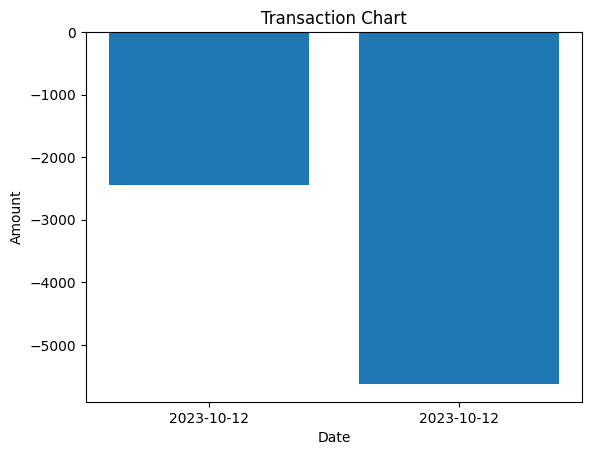

In [34]:
from matplotlib import pyplot as plt


plt.bar(range(len(dates)), amounts, tick_label=[date.strftime("%Y-%m-%d") for date in dates] )
plt.xlabel('Date')
plt.ylabel('Amount')
# plt.xticks(range(len(dates)), [date.strftime("%Y-%m-%d") for date in dates], rotation=45)
plt.title('Transaction Chart')
plt.show()

In [35]:
from io import BytesIO
import base64
buffer = BytesIO()
plt.savefig(buffer, format='png')
plot_data = base64.b64encode(buffer.getvalue()).decode()

<Figure size 640x480 with 0 Axes>

In [36]:
plot_data

'iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAYAAAA10dzkAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAIyUlEQVR4nO3WMQEAIAzAMMC/5+ECjiYKenbPzCwAADLO7wAAAN4ygAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCA